# 3.3. Mastering widgets in the Jupyter Notebook

```bash
jupyter nbextension enable --py --sys-prefix widgetsnbextension
```

In [1]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [2]:
@widgets.interact
def f(x=5):
    print(x)

interactive(children=(IntSlider(value=5, description='x', max=15, min=-5), Output()), _dom_classes=('widget-in…

In [3]:
@widgets.interact(x=(0, 5))
def f(x=5):
    print(x)

interactive(children=(IntSlider(value=5, description='x', max=5), Output()), _dom_classes=('widget-interact',)…

In [4]:
@widgets.interact_manual(
    color=['blue', 'red', 'green'], lw=(1., 10.))
def plot(freq=1., color='blue', lw=2, grid=True):
    t = np.linspace(-1., +1., 1000)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(t, np.sin(2 * np.pi * freq * t),
            lw=lw, color=color)
    ax.grid(grid)

interactive(children=(FloatSlider(value=1.0, description='freq', max=3.0, min=-1.0), Dropdown(description='col…

In [5]:
freq_slider = widgets.FloatSlider(
    value=2.,
    min=1.,
    max=10.0,
    step=0.1,
    description='Frequency:',
    readout_format='.1f',
)
freq_slider

FloatSlider(value=2.0, description='Frequency:', max=10.0, min=1.0, readout_format='.1f')

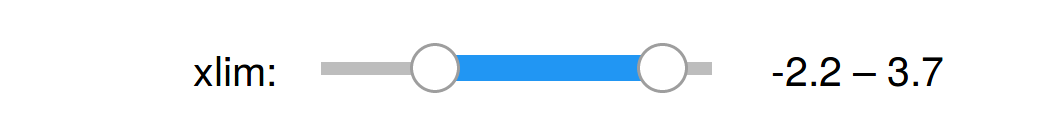

In [6]:
range_slider = widgets.FloatRangeSlider(
    value=[-1., +1.],
    min=-5., max=+5., step=0.1,
    description='xlim:',
    readout_format='.1f',
)
range_slider

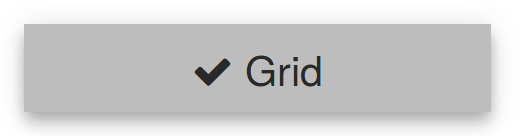

In [7]:
grid_button = widgets.ToggleButton(
    value=False,
    description='Grid',
    icon='check'
)
grid_button

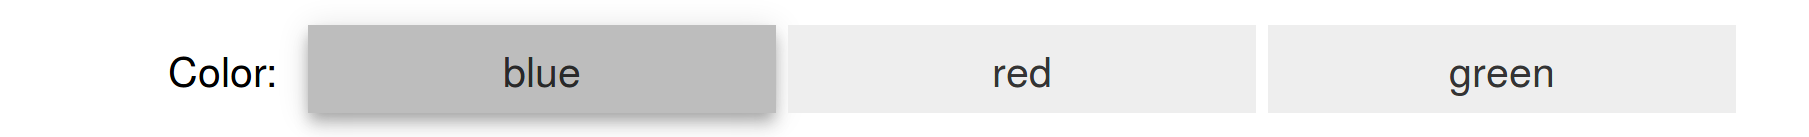

In [8]:
color_buttons = widgets.ToggleButtons(
    options=['blue', 'red', 'green'],
    description='Color:',
)
color_buttons

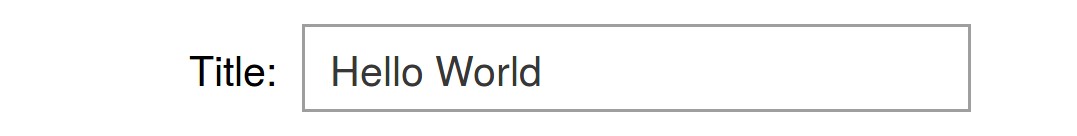

In [9]:
title_textbox = widgets.Text(
    value='Hello World',
    description='Title:',
)
title_textbox

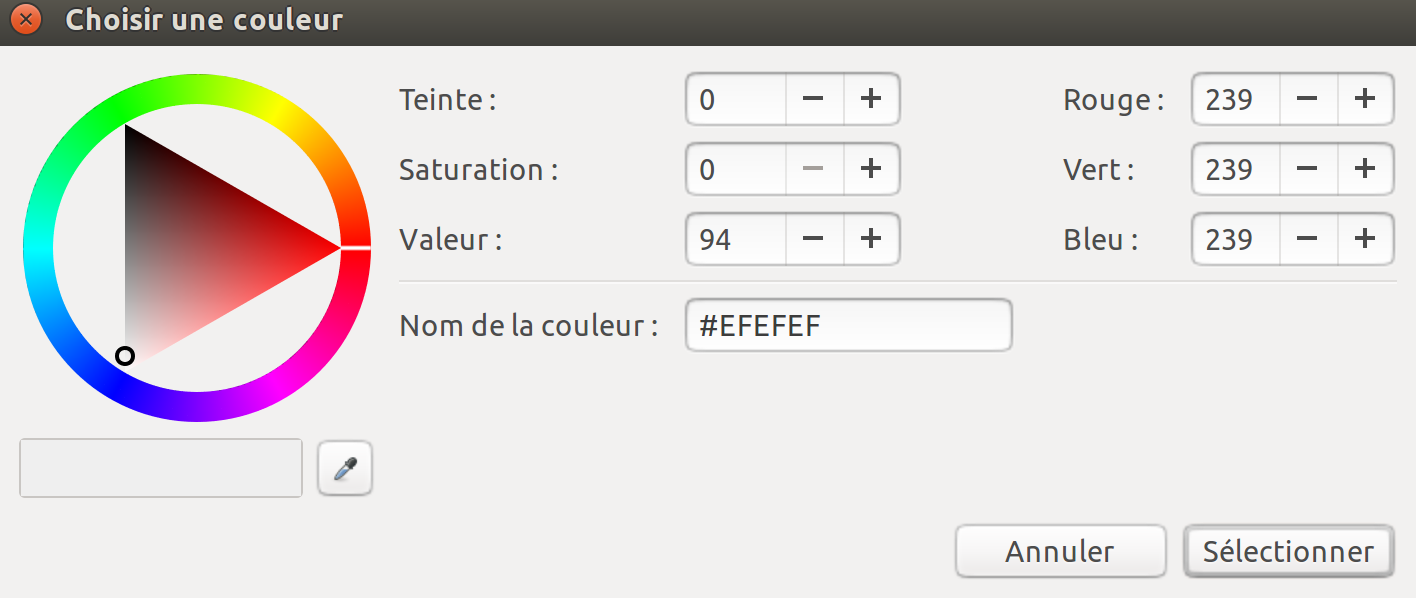

In [10]:
color_picker = widgets.ColorPicker(
    concise=True,
    description='Background color:',
    value='#efefef',
)
color_picker

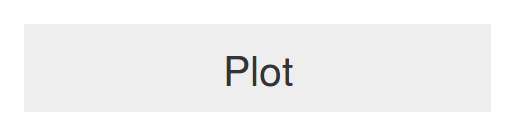

In [11]:
button = widgets.Button(
    description='Plot',
)
button

In [12]:
def plot2(b=None):
    xlim = range_slider.value
    freq = freq_slider.value
    grid = grid_button.value
    color = color_buttons.value
    title = title_textbox.value
    bgcolor = color_picker.value

    t = np.linspace(xlim[0], xlim[1], 1000)
    f, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(t, np.sin(2 * np.pi * freq * t),
            color=color)
    ax.grid(grid)

In [13]:
@button.on_click
def plot_on_click(b):
    out.clear_output(wait=True)
    with out:
        plot2()
        plt.show()

In [14]:
tab1 = VBox(children=[freq_slider,
                      range_slider,
                      ])
tab2 = VBox(children=[color_buttons,
                      HBox(children=[title_textbox,
                                     color_picker,
                                     grid_button]),
                                     ])

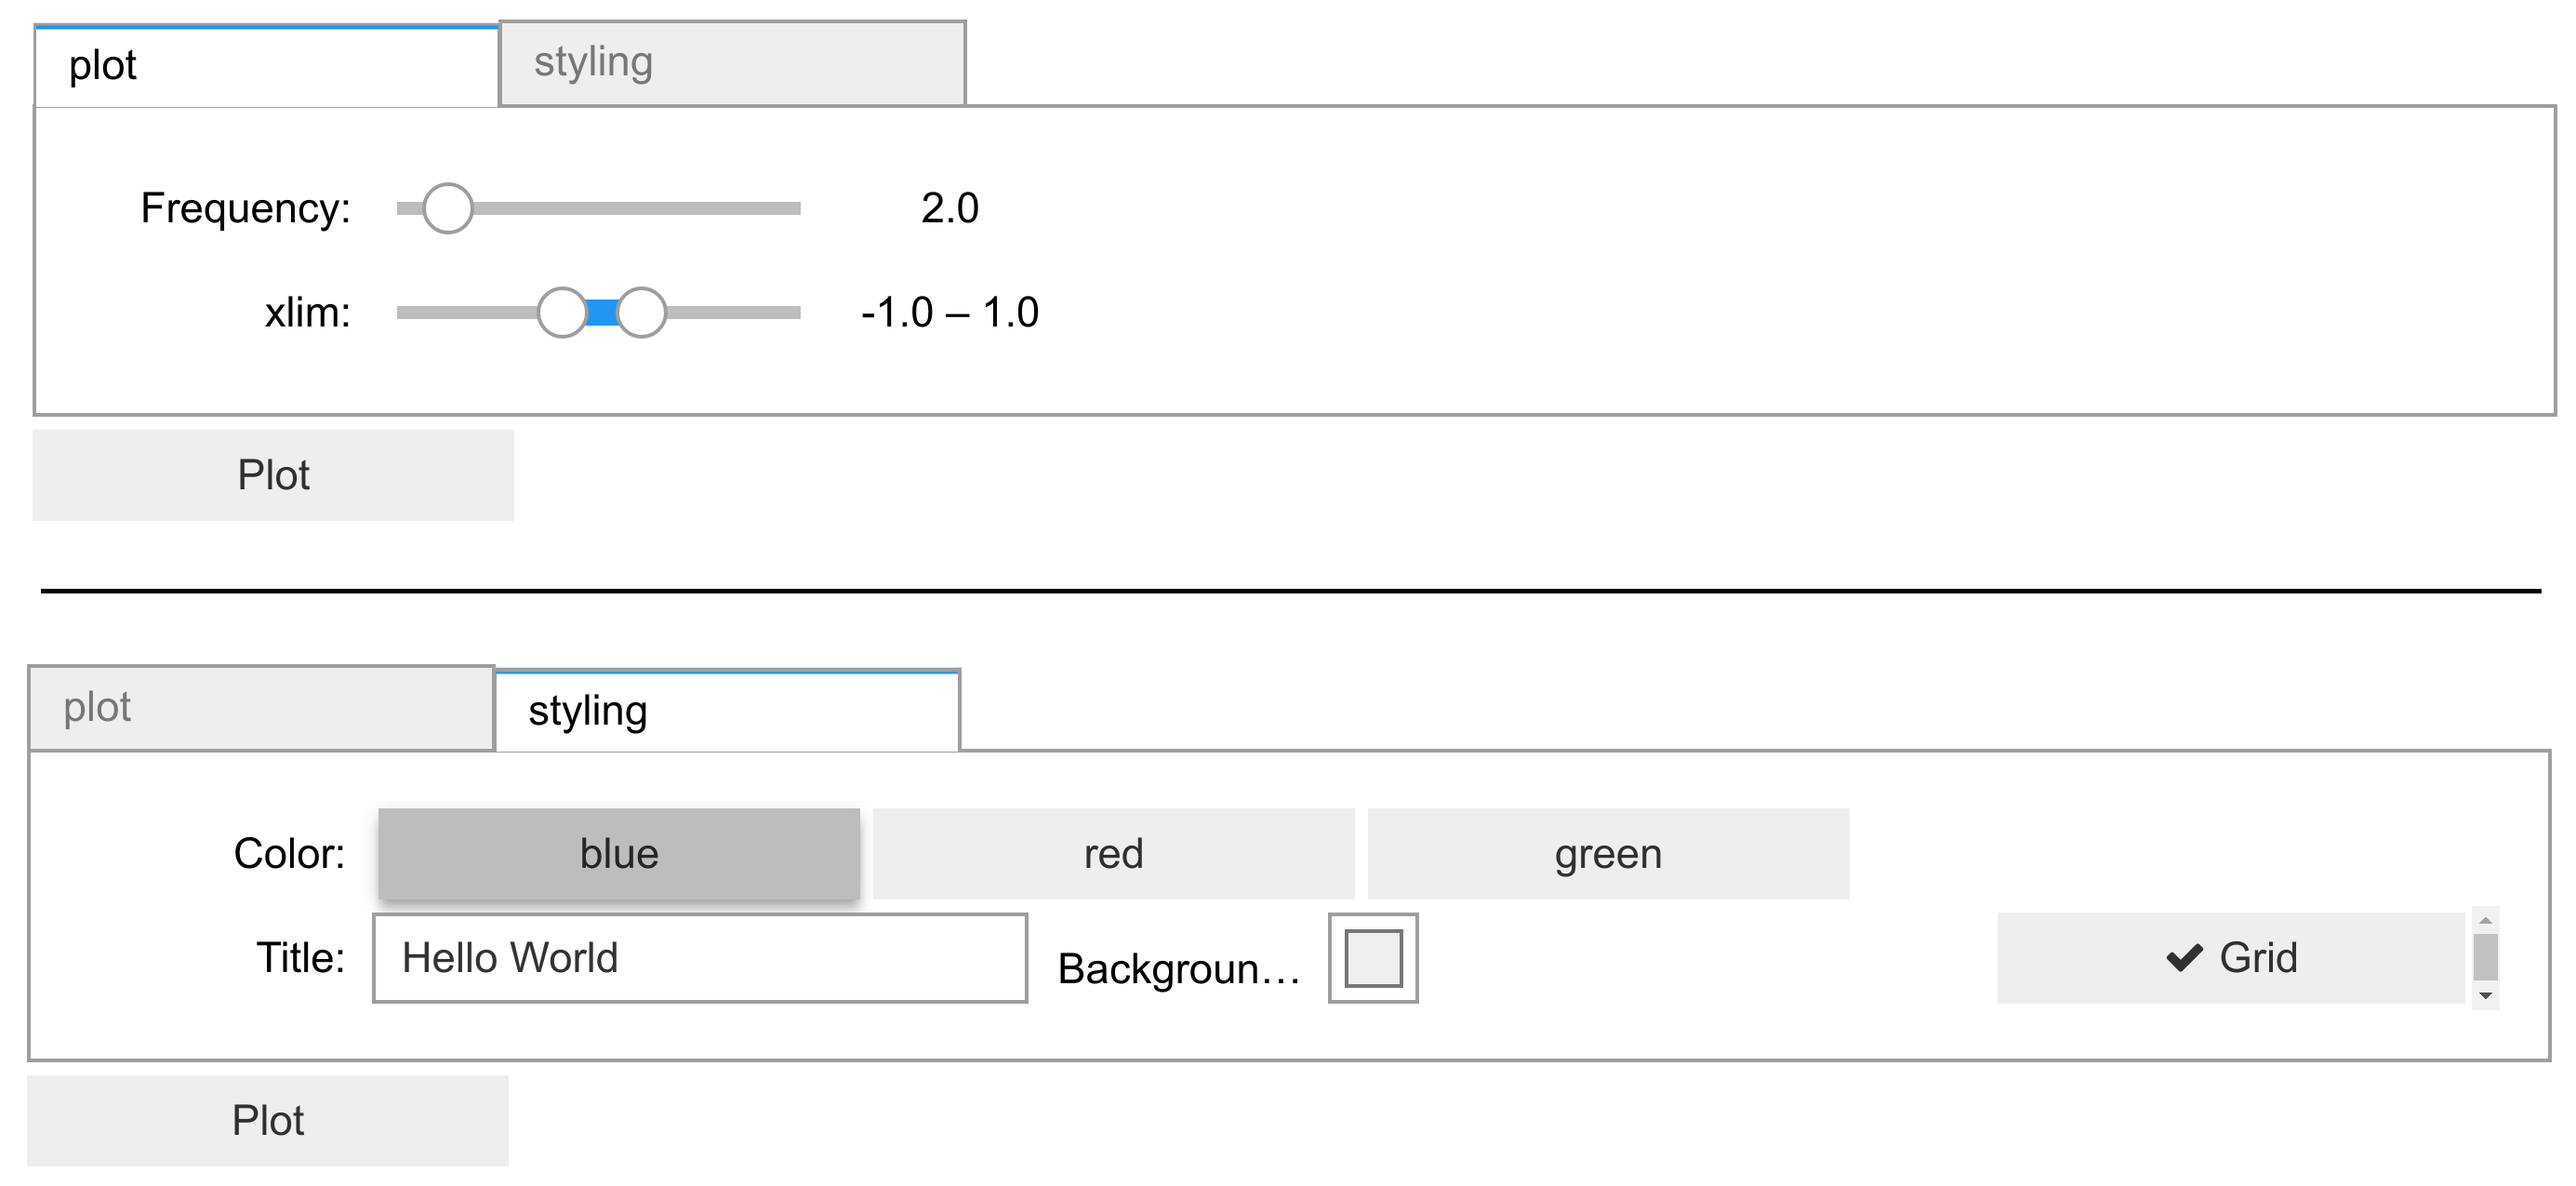

In [15]:
out = widgets.Output()
tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'plot')
tab.set_title(1, 'styling')
VBox(children=[tab, button, out])